<a href="https://colab.research.google.com/github/marinanastas/telegrams/blob/main/code/normies_ree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Данный код предназначен для проверки придуманного нами метода нормализации: мы делим количество тем на количество телеграмм




## Загрузка и подготовка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
fname = '/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/БД все телеграммы_1.xlsx'
df = pd.read_excel(fname)

## Присвоение каждой телеграмме года отправки и подсчёт количества отправленных телеграмм на каждый год

In [ ]:
def year_assignment(date):
  year = ''
  date = str(date)
  if len(date.split('.')) !=3:
   year = 'xxxx'
  else:
    year = date.split('.')[2]
  return year

In [ ]:
def nonans(t):
  if type(t) is float:
    t = 'нет данных'
  return t

In [ ]:
df['year'] = df['date'].apply(year_assignment) 

In [ ]:
results = pd.DataFrame()
results['telegs_sent'] = df['year'].groupby(df['year']).count()

In [ ]:
results

,telegs_sent
year,
1877,34
1880,1
1882,1
1883,2
1885,1
...,...
2012,2
2013,4
2014,12


## Подсчёт количества упомянутых тем на каждый год

In [ ]:
yearthem = df[['year', 'theme']]
yearthem['theme_corr'] = yearthem['theme'].apply(nonans)
themes = yearthem['theme_corr']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
topics = []
for theme in themes:
  theme = str(theme).split(', ')
  for t in theme:
    if t not in topics:
      topics.append(t)

In [ ]:
for topic in topics:
  tt = []
  for theme in themes:
    if topic in theme:
      tt.append(1)
    else:
      tt.append(0)
  yearthem[topic] = tt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
boobaplot = yearthem[topics].groupby(yearthem['year']).sum()
boobaplot['topic_diversity'] = boobaplot[topics].astype(bool).sum(axis=1)

In [ ]:
results = pd.concat([results, boobaplot], axis=1)

## Подсчёт нашего придуманного коэффициента

In [ ]:
results['normalized_coeff'] = round(results['telegs_sent']/(results['topic_diversity']+0.00001), 2)
results['inverse_normalized'] = round(results['topic_diversity']/(results['telegs_sent']+0.00001), 2)

In [ ]:
results['inverse_normalized']

year
1877    0.06
1880    1.00
1882    1.00
1883    0.50
1885    1.00
        ... 
2012    1.00
2013    0.25
2014    0.08
20хх    1.00
xxxx    0.31
Name: inverse_normalized, Length: 108, dtype: float64

In [ ]:
results[results['inverse_normalized'] == results['inverse_normalized'].max()]

,telegs_sent,день рождения,поздравление,восьмое марта,новый год,просьба,требование,долг,новости,свадьба,...,начало учебного года,манифест,политика,осуждение,вызов,возражение,день советской армии,topic_diversity,normalized_coeff,inverse_normalized
year,,,,,,,,,,,,,,,,,,,,,
1926,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0.33,3.0


## График

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

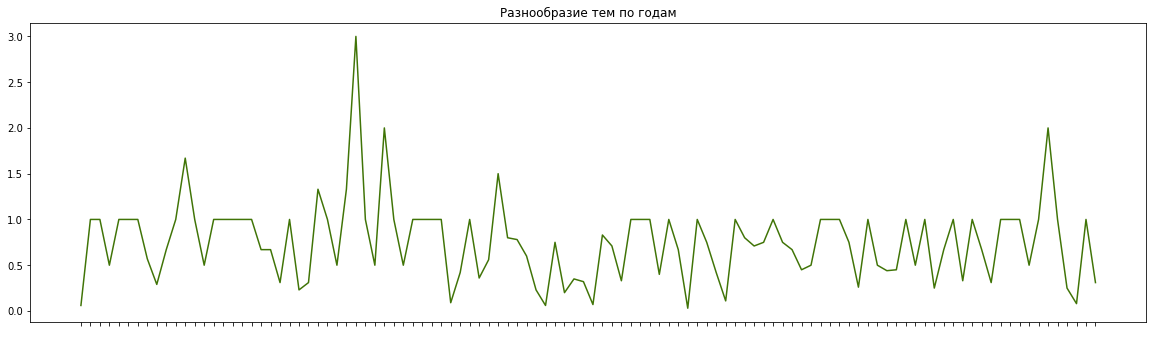

In [ ]:
plt.get_cmap("viridis")
plt.rcParams["figure.figsize"] = (20,5.5)
X = results.index
Y = results['inverse_normalized']
Y1 = results['normalized_coeff']
fig, ax = plt.subplots()
#legend = ax.legend()
ax.plot(X,Y, color = '#407407')
#ax.plot(X,Y1, color = '#740740')

plt.xticks(color = 'w')
ax.set_title('Разнообразие тем по годам')
fig.show()
plt.savefig('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/normd_local_overall')